In [1]:
import random
import numpy as np
import torch
import os
import pathlib
import pickle
import pandas as pd
torch.manual_seed(42)
torch.cuda.manual_seed(42)
from Performance import performance_evaluation
perfs = performance_evaluation()

from Performance import H2h_Regret_Evaluation
h2h_regret_eva = H2h_Regret_Evaluation()

from Data import Data_Simulator
DS_Obj = Data_Simulator()

from Oracle import Oracle_Processing
Oracle_Proc = Oracle_Processing()

from OLS import OLS_Processing
OLS_Proc = OLS_Processing()

from DDR import DDR_Processing
DDR_Proc = DDR_Processing()

from PYEPO import EPO_Processing
PYEPO_Proc = EPO_Processing()

from Data_Load_Store import Load_Store_Methods
Data_LSM = Load_Store_Methods()

import Figure_H2H_Regret

In [2]:
import Sequential_Learning_Approaches as SLA
import Integrated_Learning_Approaches as ILA

### Parameters

In [3]:
grid = (3,3) # grid size
from Network import network_design
Network = network_design()
arcs,arc_index_mapping = Network._getArcs(grid)

num_test = 1000
lower = 0 # coef lower bound
upper = 1 # coef upper bound
d = (grid[0] - 1) * (grid[0] - 1) * 2 + 2 * (grid[0] - 1) # num of arcs
num_nodes = grid[0]*grid[0]
coef_seed = 1

x_dist = 'uniform'
e_dist = 'normal'
x_low = -2
x_up = 2
x_mean = 2
x_var = 2
bump = 100

In [4]:
data_generation_process = "SPO_Data_Generation"
# data_generation_process = "DDR_Data_Generation"
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
project_directory = os.path.dirname(os.path.dirname(os.path.dirname(parent_directory)))
DataPath_Parent = project_directory + '/Data_JOC_R1_Submit/Shortest_Path_Final/Quadratic_Term_deg_all_' + data_generation_process + f'/{grid[0]}by{grid[1]}_grid_All/'
pathlib.Path(DataPath_Parent).mkdir(parents=True, exist_ok=True)
print("DataPath_parent:", DataPath_Parent)
Result_dir = DataPath_Parent + "Result/"
pathlib.Path(Result_dir).mkdir(parents=True, exist_ok=True)

DataPath_parent: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Quadratic_Term_deg_all_SPO_Data_Generation/3by3_grid_All/


### Impact of model misspecification when N changes

In [5]:
num_feat = 5 # size of feature
p = num_feat
e = 0.5 # scale of normal std or the range of uniform. For the error term
alpha = e # scale of normal std or the range of uniform. For the error term
iteration_all = np.arange(0,100)
batch_size = 20
num_epochs = 1000
num_train_all = [500]
mu_all = [0.75]
lamb_all = [0.8]
deg_all = [0.4,0.6,0.8,1.0,1.5,2.0,4.0,8.0] # polynomial degree

##### Data Generation

In [6]:
for num_train in num_train_all:
    for deg in deg_all:
        mis = deg # model misspecification
        DataPath = DataPath_Parent + f"data_size={num_train}_deg={deg}_e={e}_p={p}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
        pathlib.Path(DataPath).mkdir(parents=True, exist_ok=True)
        print("DataPath:", DataPath)
        if os.path.exists(DataPath+"x_test_all.pkl"):
            print("Already Exist")
        else:
            x_test_all, c_test_all, x_train_all, c_train_all,noise_train_all,noise_test_all,W_star_all = \
            DS_Obj.Simulator(DataPath,lower, upper, p, d, coef_seed,iteration_all,num_test, num_train, alpha,mis,data_generation_process,x_dist, e_dist, x_low, x_up, x_mean, x_var, bump)
            Data_LSM.store_input_data(DataPath,x_test_all,c_test_all,x_train_all,c_train_all,noise_test_all,noise_train_all,W_star_all)

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Quadratic_Term_deg_all_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=0.4_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
Already Exist
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Quadratic_Term_deg_all_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=0.6_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
Already Exist
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Quadratic_Term_deg_all_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=0.8_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
Already Exist
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Quadratic_Term_deg_all_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=1.0_e=0.5_p=5_num_test=1000_x_di

##### Run Oracle

In [7]:
for num_train in num_train_all:
    for deg in deg_all:
        mis = deg # model misspecification
        DataPath = DataPath_Parent + f"data_size={num_train}_deg={deg}_e={e}_p={p}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
        print("DataPath:", DataPath)
        if os.path.exists(DataPath+"cost_Oracle_Ante_all.pkl"):
            print("Results already exist")
        else:
            SLA.Run_Oracle(DataPath,arcs, grid,mis,bump,iteration_all,num_feat,data_generation_process)

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Quadratic_Term_deg_all_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=0.4_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
Results already exist
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Quadratic_Term_deg_all_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=0.6_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
Results already exist
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Quadratic_Term_deg_all_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=0.8_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
Results already exist
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Quadratic_Term_deg_all_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=1.0_e=0.

##### Run OLS

In [8]:
# for num_train in num_train_all:
#     for deg in deg_all:
#         mis = deg # model misspecification
#         DataPath = DataPath_Parent + f"data_size={num_train}_deg={deg}_e={e}_p={p}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
#         print("DataPath:", DataPath)
#         if os.path.exists(DataPath+"cost_OLS_Ante_all.pkl"):
#             print("Results already exist")
#         else:
#             SLA.Run_OLS(DataPath,arcs, grid,mis,bump,iteration_all,num_feat,data_generation_process)

##### Run DDR

In [9]:
for num_train in num_train_all:
    for deg in deg_all:
        mis = deg # model misspecification
        DataPath = DataPath_Parent + f"data_size={num_train}_deg={deg}_e={e}_p={p}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
        print("DataPath:", DataPath)
        if os.path.exists(DataPath+"cost_DDR_Ante_all.pkl"):
            print("Results already exist")
        else:
            ILA.Run_DDR(DataPath,mu_all,lamb_all,arcs, grid,mis,bump,iteration_all,num_feat,data_generation_process)

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Quadratic_Term_deg_all_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=0.4_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
Results already exist
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Quadratic_Term_deg_all_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=0.6_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
Results already exist
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Quadratic_Term_deg_all_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=0.8_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
Results already exist
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Quadratic_Term_deg_all_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=1.0_e=0.

##### Run SPO+

In [10]:
for num_train in num_train_all:
    method_names = ["spo+"]
    for deg in deg_all:
        mis = deg # model misspecification
        DataPath = DataPath_Parent + f"data_size={num_train}_deg={deg}_e={e}_p={p}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
        print("DataPath:", DataPath)
        if os.path.exists(DataPath+"cost_spo+_Ante_all.pkl"):
            print("Results already exist")
        else:
            ILA.run_EPO_approaches(DataPath,method_names,arcs, grid,mis,bump,iteration_all,num_feat,data_generation_process)

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Quadratic_Term_deg_all_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=0.4_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
Results already exist
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Quadratic_Term_deg_all_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=0.6_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
Results already exist
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Quadratic_Term_deg_all_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=0.8_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
Results already exist
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Quadratic_Term_deg_all_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=1.0_e=0.

##### Run PG

In [11]:
for num_train in num_train_all:
    method_names = ["pg"]
    for deg in deg_all:
        mis = deg # model misspecification
        DataPath = DataPath_Parent + f"data_size={num_train}_deg={deg}_e={e}_p={p}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
        print("DataPath:", DataPath)
        if os.path.exists(DataPath+"cost_pg_Ante_all.pkl"):
            print("Results already exist")
        else:
            ILA.run_EPO_approaches(DataPath,method_names,arcs, grid,mis,bump,iteration_all,num_feat,data_generation_process)

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Quadratic_Term_deg_all_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=0.4_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
Results already exist
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Quadratic_Term_deg_all_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=0.6_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
Results already exist
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Quadratic_Term_deg_all_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=0.8_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
Results already exist
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Quadratic_Term_deg_all_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=1.0_e=0.

##### Run LTR

In [12]:
for num_train in num_train_all:
    method_names = ["ltr"]
    for deg in deg_all:
        mis = deg # model misspecification
        DataPath = DataPath_Parent + f"data_size={num_train}_deg={deg}_e={e}_p={p}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
        print("DataPath:", DataPath)
        if os.path.exists(DataPath+"cost_ltr_Ante_all.pkl"):
            print("Results already exist")
        else:
            ILA.run_EPO_approaches(DataPath,method_names,arcs, grid,mis,bump,iteration_all,num_feat,data_generation_process)

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Quadratic_Term_deg_all_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=0.4_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
Results already exist
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Quadratic_Term_deg_all_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=0.6_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
Results already exist
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Quadratic_Term_deg_all_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=0.8_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
Results already exist
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Quadratic_Term_deg_all_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=1.0_e=0.

### Run Approahces with quadratic term

In [13]:
deg_all = [8.0]

##### DDR with quadratic

In [14]:
for num_train in num_train_all:
    for deg in deg_all:
        mis = deg # model misspecification
        DataPath = DataPath_Parent + f"data_size={num_train}_deg={deg}_e={e}_p={p}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
        print("DataPath:", DataPath)
        if os.path.exists(DataPath+"cost_DDR_Ante_quad_all.pkl"):
            print("Results already exist")
        else:
            ILA.Run_DDR_Quadratic(DataPath,mu_all,lamb_all,arcs, grid,mis,bump,iteration_all,num_feat,data_generation_process)

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Quadratic_Term_deg_all_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=8.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
Results already exist


##### SPO+ with quadratic

In [15]:
for num_train in num_train_all:
    method_names = ["spo+"]
    for deg in deg_all:
        mis = deg # model misspecification
        DataPath = DataPath_Parent + f"data_size={num_train}_deg={deg}_e={e}_p={p}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
        print("DataPath:", DataPath)
        if os.path.exists(DataPath+"cost_spo+_Ante_quad_all.pkl"):
            print("Results already exist")
        else:
            ILA.run_EPO_approaches_Quadratic(DataPath,method_names,arcs, grid,mis,bump,iteration_all,num_feat,data_generation_process)

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Quadratic_Term_deg_all_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=8.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
Results already exist


In [16]:
# for num_train in num_train_all:
#     method_names = ["pg"]
#     for deg in deg_all:
#         mis = deg # model misspecification
#         DataPath = DataPath_Parent + f"data_size={num_train}_deg={deg}_e={e}_p={p}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
#         print("DataPath:", DataPath)
#         if os.path.exists(DataPath+"cost_pg_Ante_quad_all.pkl"):
#             print("Results already exist")
#         else:
#             ILA.run_EPO_approaches_Quadratic(DataPath,method_names,arcs, grid,mis,bump,iteration_all,num_feat,data_generation_process)

In [17]:
# for num_train in num_train_all:
#     method_names = ["ltr"]
#     for deg in deg_all:
#         mis = deg # model misspecification
#         DataPath = DataPath_Parent + f"data_size={num_train}_deg={deg}_e={e}_p={p}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
#         print("DataPath:", DataPath)
#         if os.path.exists(DataPath+"cost_ltr_Ante_quad_all.pkl"):
#             print("Results already exist")
#         else:
#             ILA.run_EPO_approaches_Quadratic(DataPath,method_names,arcs, grid,mis,bump,iteration_all,num_feat,data_generation_process)

##### OLS with quadratic

In [18]:
# for num_train in num_train_all:
#     for deg in deg_all:
#         mis = deg # model misspecification
#         DataPath = DataPath_Parent + f"data_size={num_train}_deg={deg}_e={e}_p={p}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
#         print("DataPath:", DataPath)
#         if os.path.exists(DataPath+"cost_OLS_Ante_quad_all.pkl"):
#             print("Results already exist")
#         else:
#             SLA.Run_OLS_Quadratic(DataPath,arcs, grid,mis,bump,iteration_all,num_feat,data_generation_process)

### Comparison

In [19]:
def h2h_regret(iteration_all,cost_this_all,cost_bench_all,cost_Oracle_Ante_all):
    h2h_ = np.zeros(len(iteration_all)); cost_rd_ = np.zeros(len(iteration_all)); regret_rd_ = np.zeros(len(iteration_all))
    for iter_index in range(len(iteration_all)):
        iter = iteration_all[iter_index]
        h2h_[iter_index],cost_rd_[iter_index],regret_rd_[iter_index] = h2h_regret_eva.cross_compare2plus(cost_this_all[iter], cost_bench_all[iter], cost_Oracle_Ante_all[iter])
    return h2h_,regret_rd_

In [20]:
def calculate_h2h_regret_this_vs_benchmarks(num_train_all,deg_all,this_method,benchmark_methods,is_ddr,mu,lamb,is_bench_ddr):
    h2h_ddr_vs_ = {}; cost_rd_ddr_vs_ = {}; regret_rd_ddr_vs_ = {}
    for num_train in num_train_all:
        for deg in deg_all:
            DataPath = DataPath_Parent + f"data_size={num_train}_deg={deg}_e={e}_p={p}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
            print("DataPath:", DataPath)     
            with open(DataPath+'cost_Oracle_Ante_all.pkl', "rb") as tf:
                cost_Oracle_Ante_all = pickle.load(tf)
            with open(DataPath+this_method, "rb") as tf:
                cost_this = pickle.load(tf)
            with open(DataPath+benchmark_methods, "rb") as tf:
                cost_bench = pickle.load(tf)

            if is_ddr:
                cost_this_input = {}
                for iter in iteration_all:
                    cost_this_input[iter] = cost_this[iter,mu,lamb]
            else:
                cost_this_input = cost_this
            if is_bench_ddr:
                cost_bench_input = {}
                for iter in iteration_all:
                    cost_bench_input[iter] = cost_bench[iter,mu,lamb]
            else:
                cost_bench_input = cost_bench

            h2h_ddr_vs_[num_train,deg],regret_rd_ddr_vs_[num_train,deg] = h2h_regret(iteration_all,cost_this_input,cost_bench_input,cost_Oracle_Ante_all)

        print("num_train = ",num_train,",deg = ",deg)
    return h2h_ddr_vs_,regret_rd_ddr_vs_

### Performance under diff $\beta$ and without quadratic term 

In [21]:
deg_all = [0.4,0.6,0.8,1.0,1.5,2.0,4.0,8.0]

##### DDR vs SPO+

In [22]:
regret_DDR_vs_SPO_d_ante_Dict = {}; h2h_DDR_vs_SPO_d_ante_Dict = {}
for mu in mu_all:
    for lamb in lamb_all:
        regret_d_ante = np.zeros(len(deg_all)); h2h_d_ante = np.zeros(len(deg_all))
        _index = 0
        for deg in deg_all:
            mis = deg # model misspecification
            DataPath = DataPath_Parent + f"data_size={num_train}_deg={deg}_e={e}_p={p}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
            print("DataPath:", DataPath)

            cost_Oracle_Ante_all,cost_OLS_Ante_all,cost_DDR_Ante_all = Data_LSM.load_cost_data(DataPath)
            with open(DataPath+'cost_spo+_Ante_all.pkl', "rb") as tf:
                cost_SPO_Ante_all = pickle.load(tf)            
            h2h_d_ante[_index], regret_d_ante[_index] = h2h_regret_eva.calculate_h2h_regret(mu,lamb,iteration_all,\
                                0,0,0,cost_DDR_Ante_all,cost_SPO_Ante_all,cost_Oracle_Ante_all)
            _index = _index + 1
        regret_DDR_vs_SPO_d_ante_Dict[mu,lamb] = regret_d_ante
        h2h_DDR_vs_SPO_d_ante_Dict[mu,lamb] = h2h_d_ante
with open(Result_dir+'regret_DDR_vs_SPO_d_ante_Dict.pkl', "wb") as tf:
    pickle.dump(regret_DDR_vs_SPO_d_ante_Dict,tf)
with open(Result_dir+'h2h_DDR_vs_SPO_d_ante_Dict.pkl', "wb") as tf:
    pickle.dump(h2h_DDR_vs_SPO_d_ante_Dict,tf)

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Quadratic_Term_deg_all_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=0.4_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Quadratic_Term_deg_all_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=0.6_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Quadratic_Term_deg_all_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=0.8_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Quadratic_Term_deg_all_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=1.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users

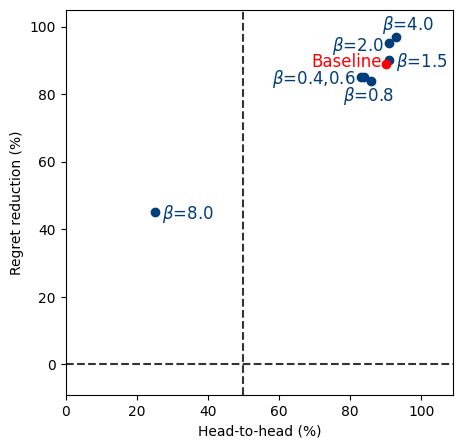

In [23]:
mu = 0.75
lamb = 0.8
h2h_fig = h2h_DDR_vs_SPO_d_ante_Dict[mu,lamb] * 100
regret_fig = regret_DDR_vs_SPO_d_ante_Dict[mu,lamb] * 100

ms = 6 # marker size
fs = 12 # font size
ls = 12 # label size
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5, 5))
d_indices = [0, 1, 2, 4, 5, 6, 7]
for i in d_indices:
    ax.plot(h2h_fig[i], regret_fig[i], color='#003D7C', marker='o', markersize = ms,linestyle='None')
ax.plot(h2h_fig[3], regret_fig[3],color='red', marker='o', markersize = ms,linestyle='None')
ax.text(h2h_fig[3] - 21, regret_fig[3] - 1, 'Baseline', color='red',fontsize=fs)

# ax.plot(h2h_fig[7], regret_fig[7], color='red', marker='o', markersize = ms,linestyle='None')
ax.text(h2h_fig[0] - 25, regret_fig[0] - 2, fr'$\beta$=0.4,0.6', color='#003D7C',fontsize=fs)
ax.text(h2h_fig[2] - 8, regret_fig[2] - 6, fr'$\beta$={deg_all[2]}', color='#003D7C',fontsize=fs)
ax.text(h2h_fig[4] + 2, regret_fig[4] - 2, fr'$\beta$={deg_all[4]}', color='#003D7C',fontsize=fs)
ax.text(h2h_fig[5] - 16, regret_fig[5] - 2, fr'$\beta$={deg_all[5]}', color='#003D7C',fontsize=fs)
ax.text(h2h_fig[6] - 4, regret_fig[6] + 2, fr'$\beta$={deg_all[6]}', color='#003D7C',fontsize=fs)
ax.text(h2h_fig[7] + 2, regret_fig[7] - 2, fr'$\beta$={deg_all[7]}', color='#003D7C',fontsize=fs)

# ax.set_title(r'Effect of model misspecification: $\beta$')
ax.set_xlabel('Head-to-head (%)')
ax.set_ylabel('Regret reduction (%)')
# ax.grid(True)

ax.axvline(50, linestyle='dashed', alpha=0.8, color='k')
ax.axhline(0.0, linestyle='dashed', alpha=0.8, color='k')
ax.set_xlim(0, 109)
ax.set_ylim(-9, 105)
ax.label_outer()

# plt.tight_layout()
fig.savefig(Result_dir + f'DDR_vs_SPO_Mis_ante_mu={mu}_lamb={lamb}_N={num_train}.pdf', format='pdf', bbox_inches="tight")
plt.show()

##### DDR vs PG

In [24]:
regret_DDR_vs_PG_d_ante_Dict = {}; h2h_DDR_vs_PG_d_ante_Dict = {}
for mu in mu_all:
    for lamb in lamb_all:
        regret_d_ante = np.zeros(len(deg_all)); h2h_d_ante = np.zeros(len(deg_all))
        _index = 0
        for deg in deg_all:
            mis = deg # model misspecification
            DataPath = DataPath_Parent + f"data_size={num_train}_deg={deg}_e={e}_p={p}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
            print("DataPath:", DataPath)

            cost_Oracle_Ante_all,cost_OLS_Ante_all,cost_DDR_Ante_all = Data_LSM.load_cost_data(DataPath)
            with open(DataPath+'cost_pg_Ante_all.pkl', "rb") as tf:
                cost_PG_Ante_all = pickle.load(tf)            
            h2h_d_ante[_index], regret_d_ante[_index] = h2h_regret_eva.calculate_h2h_regret(mu,lamb,iteration_all,\
                                0,0,0,cost_DDR_Ante_all,cost_PG_Ante_all,cost_Oracle_Ante_all)
            _index = _index + 1
        regret_DDR_vs_PG_d_ante_Dict[mu,lamb] = regret_d_ante
        h2h_DDR_vs_PG_d_ante_Dict[mu,lamb] = h2h_d_ante
with open(Result_dir+'regret_DDR_vs_PG_d_ante_Dict.pkl', "wb") as tf:
    pickle.dump(regret_DDR_vs_PG_d_ante_Dict,tf)
with open(Result_dir+'h2h_DDR_vs_PG_d_ante_Dict.pkl', "wb") as tf:
    pickle.dump(h2h_DDR_vs_PG_d_ante_Dict,tf)

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Quadratic_Term_deg_all_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=0.4_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Quadratic_Term_deg_all_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=0.6_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Quadratic_Term_deg_all_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=0.8_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Quadratic_Term_deg_all_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=1.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users

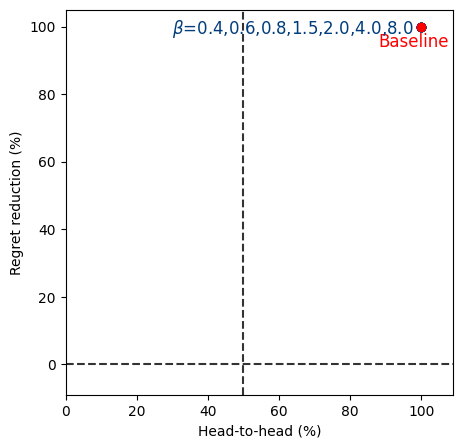

In [25]:
mu = 0.75
lamb = 0.8
h2h_fig = h2h_DDR_vs_PG_d_ante_Dict[mu,lamb] * 100
regret_fig = regret_DDR_vs_PG_d_ante_Dict[mu,lamb] * 100

ms = 6 # marker size
fs = 12 # font size
ls = 12 # label size
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5, 5))
d_indices = [0, 1, 2, 4, 5, 6, 7]
for i in d_indices:
    ax.plot(h2h_fig[i], regret_fig[i], color='#003D7C', marker='o', markersize = ms,linestyle='None')
ax.plot(h2h_fig[3], regret_fig[3],color='red', marker='o', markersize = ms,linestyle='None')
ax.text(h2h_fig[3] - 12, regret_fig[3] - 6, 'Baseline', color='red',fontsize=fs)

# ax.text(h2h_fig[0] - 10, regret_fig[0] - 0.2, fr'$\beta$={deg_all[0]}', color='#003D7C',fontsize=fs)
# ax.text(h2h_fig[1] - 0.06, regret_fig[1] - 0.01, fr'$\beta$={deg_all[1]}', color='#003D7C',fontsize=fs)
ax.text(h2h_fig[2] - 70, regret_fig[2] - 2, fr'$\beta$=0.4,0.6,0.8,1.5,2.0,4.0,8.0', color='#003D7C',fontsize=fs)
# ax.set_title(r'Effect of model misspecification: $\beta$')
ax.set_xlabel('Head-to-head (%)')
ax.set_ylabel('Regret reduction (%)')
# ax.grid(True)

ax.axvline(50, linestyle='dashed', alpha=0.8, color='k')
ax.axhline(0.0, linestyle='dashed', alpha=0.8, color='k')
ax.set_xlim(0, 109)
ax.set_ylim(-9, 105)
ax.label_outer()

# plt.tight_layout()
fig.savefig(Result_dir + f'DDR_vs_PG_Mis_ante_mu={mu}_lamb={lamb}_N={num_train}.pdf', format='pdf', bbox_inches="tight")
plt.show()


In [26]:
regret_DDR_vs_LTR_d_ante_Dict = {}; h2h_DDR_vs_LTR_d_ante_Dict = {}
for mu in mu_all:
    for lamb in lamb_all:
        regret_d_ante = np.zeros(len(deg_all)); h2h_d_ante = np.zeros(len(deg_all))
        _index = 0
        for deg in deg_all:
            mis = deg # model misspecification
            DataPath = DataPath_Parent + f"data_size={num_train}_deg={deg}_e={e}_p={p}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
            print("DataPath:", DataPath)

            cost_Oracle_Ante_all,cost_OLS_Ante_all,cost_DDR_Ante_all = Data_LSM.load_cost_data(DataPath)
            with open(DataPath+'cost_ltr_Ante_all.pkl', "rb") as tf:
                cost_LTR_Ante_all = pickle.load(tf)            
            h2h_d_ante[_index], regret_d_ante[_index] = h2h_regret_eva.calculate_h2h_regret(mu,lamb,iteration_all,\
                                0,0,0,cost_DDR_Ante_all,cost_LTR_Ante_all,cost_Oracle_Ante_all)
            _index = _index + 1
        regret_DDR_vs_LTR_d_ante_Dict[mu,lamb] = regret_d_ante
        h2h_DDR_vs_LTR_d_ante_Dict[mu,lamb] = h2h_d_ante
with open(Result_dir+'regret_DDR_vs_LTR_d_ante_Dict.pkl', "wb") as tf:
    pickle.dump(regret_DDR_vs_LTR_d_ante_Dict,tf)
with open(Result_dir+'h2h_DDR_vs_LTR_d_ante_Dict.pkl', "wb") as tf:
    pickle.dump(h2h_DDR_vs_LTR_d_ante_Dict,tf)

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Quadratic_Term_deg_all_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=0.4_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Quadratic_Term_deg_all_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=0.6_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Quadratic_Term_deg_all_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=0.8_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Quadratic_Term_deg_all_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=1.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
DataPath: /Users

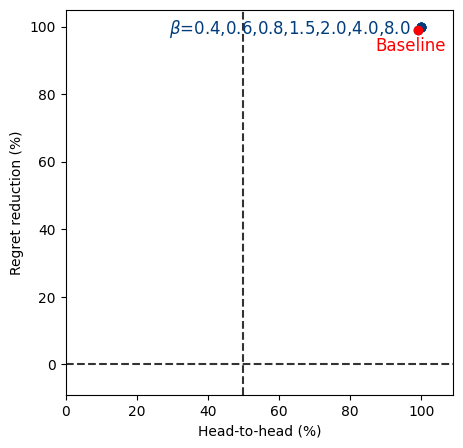

In [27]:
mu = 0.75
lamb = 0.8
h2h_fig = h2h_DDR_vs_LTR_d_ante_Dict[mu,lamb] * 100
regret_fig = regret_DDR_vs_LTR_d_ante_Dict[mu,lamb] * 100

ms = 6 # marker size
fs = 12 # font size
ls = 12 # label size
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5, 5))
d_indices = [0, 1, 2, 4, 5, 6, 7]
for i in d_indices:
    ax.plot(h2h_fig[i], regret_fig[i], color='#003D7C', marker='o', markersize = ms,linestyle='None')
ax.plot(h2h_fig[3], regret_fig[3],color='red', marker='o', markersize = ms,linestyle='None')
ax.text(h2h_fig[3] - 12, regret_fig[3] - 6, 'Baseline', color='red',fontsize=fs)

ax.text(h2h_fig[0] - 70, regret_fig[0] - 1, fr'$\beta$=0.4,0.6,0.8,1.5,2.0,4.0,8.0', color='#003D7C',fontsize=fs)

# ax.set_title(r'Effect of model misspecification: $\beta$')
ax.set_xlabel('Head-to-head (%)')
ax.set_ylabel('Regret reduction (%)')
# ax.grid(True)

ax.axvline(50, linestyle='dashed', alpha=0.8, color='k')
ax.axhline(0.0, linestyle='dashed', alpha=0.8, color='k')
ax.set_xlim(0, 109)
ax.set_ylim(-9, 105)
ax.label_outer()

# plt.tight_layout()
fig.savefig(Result_dir + f'DDR_vs_LTR_Mis_ante_mu={mu}_lamb={lamb}_N={num_train}.pdf', format='pdf', bbox_inches="tight")
plt.show()


##### Quadratic vs baseline

In [28]:
deg_all = [8.0]

- DDR without quadratic vs SPO+ without quadratic

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Quadratic_Term_deg_all_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=8.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
num_train =  500 ,deg =  8.0


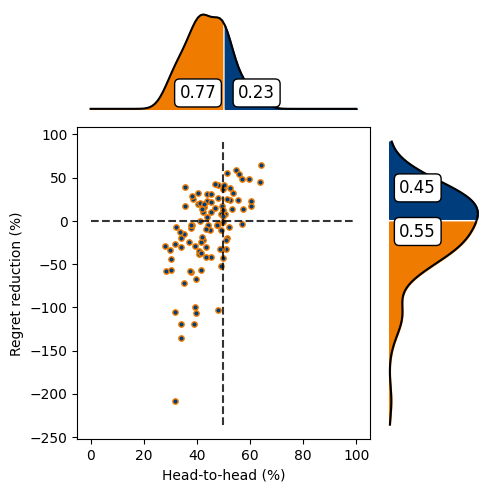

In [29]:
num_train = 500
deg = deg_all[0]
mu = 0.75
lamb = 0.8
file_name = Result_dir + f'DDR_wo_vs_SPO_wo_mu={mu}_lamb={lamb}_N={num_train}_deg={deg}'
h2h_ddr_wo_vs_spo_wo,regret_rd_ddr_wo_vs_spo_wo = calculate_h2h_regret_this_vs_benchmarks(num_train_all,deg_all,'cost_DDR_Ante_all.pkl','cost_spo+_Ante_all.pkl',True,mu,lamb,False)
all_x = h2h_ddr_wo_vs_spo_wo[num_train,deg] * 100
all_y = regret_rd_ddr_wo_vs_spo_wo[num_train,deg] * 100
Figure_H2H_Regret.figure_plot_upright(all_x, all_y, file_name, size = (5, 5), move = [-0.07, 0.07, 0.35, 0.55], ysame = 0, yrange = [6,6], sublabel = '', ypio = 0)

- DDR with quadratic vs SPO+ with quadratic 

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Quadratic_Term_deg_all_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=8.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
num_train =  500 ,deg =  8.0


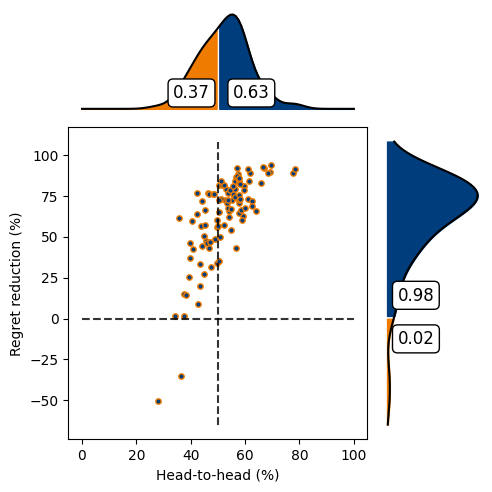

In [30]:
num_train = 500
deg = deg_all[0]
mu = 0.75
lamb = 0.8
file_name = Result_dir + f'DDR_wi_vs_SPO_wi_mu={mu}_lamb={lamb}_N={num_train}_deg={deg}'
h2h_ddr_wi_vs_spo_wi,regret_rd_ddr_wi_vs_spo_wi = calculate_h2h_regret_this_vs_benchmarks(num_train_all,deg_all,'cost_DDR_Ante_quad_all.pkl',"cost_spo+_Ante_quad_all.pkl",True,mu,lamb,False)
all_x = h2h_ddr_wi_vs_spo_wi[num_train,deg] * 100
all_y = regret_rd_ddr_wi_vs_spo_wi[num_train,deg] * 100
Figure_H2H_Regret.figure_plot_upright(all_x, all_y, file_name, size = (5, 5), move = [-0.07, 0.07, 0.35, 0.55], ysame = 0, yrange = [6,6], sublabel = '', ypio = 0)

- DDR with quadratic vs SPO+ without quadratic

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Quadratic_Term_deg_all_SPO_Data_Generation/3by3_grid_All/data_size=500_deg=8.0_e=0.5_p=5_num_test=1000_x_dist=uniform_e_dist=normal/
num_train =  500 ,deg =  8.0


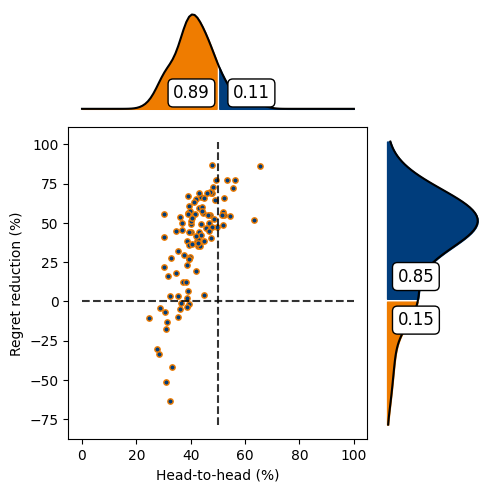

In [31]:
num_train = 500
deg = deg_all[0]
mu = 0.75
lamb = 0.8
file_name = Result_dir + f'DDR_wi_vs_SPO_wo_mu={mu}_lamb={lamb}_N={num_train}_deg={deg}'
h2h_ddr_wi_vs_spo_wo,regret_rd_ddr_wi_vs_spo_wo = calculate_h2h_regret_this_vs_benchmarks(num_train_all,deg_all,'cost_DDR_Ante_quad_all.pkl','cost_spo+_Ante_all.pkl',True,mu,lamb,False)
all_x = h2h_ddr_wi_vs_spo_wo[num_train,deg] * 100
all_y = regret_rd_ddr_wi_vs_spo_wo[num_train,deg] * 100
Figure_H2H_Regret.figure_plot_upright(all_x, all_y, file_name, size = (5, 5), move = [-0.07, 0.07, 0.35, 0.55], ysame = 0, yrange = [6,6], sublabel = '', ypio = 0)

- OLS quadratic with OLS without quadratic

In [32]:
# num_train = 500
# deg = deg_all[0]
# mu = 0.75
# lamb = 0.8
# file_name = Result_dir + f'OLS_wi_vs_OLS_wo_mu={mu}_lamb={lamb}_N={num_train}_deg={deg}'
# h2h_ols_wi_vs_ols_wo,regret_rd_ols_wi_vs_ols_wo = calculate_h2h_regret_this_vs_benchmarks(num_train_all,deg_all,'cost_OLS_Ante_quad_all.pkl','cost_OLS_Ante_all.pkl',False,mu,lamb,False)
# all_x = h2h_ols_wi_vs_ols_wo[num_train,deg] * 100
# all_y = regret_rd_ols_wi_vs_ols_wo[num_train,deg] * 100
# Figure_H2H_Regret.figure_plot_upright(all_x, all_y, file_name, size = (5, 5), move = [-0.07, 0.07, 0.35, 0.55], ysame = 0, yrange = [6,6], sublabel = '', ypio = 0)

- SPO+ with quadratic with SPO+ without quadratic

In [33]:
# num_train = 500
# deg = deg_all[0]
# mu = 0.75
# lamb = 0.8
# file_name = Result_dir + f'SPO_wi_vs_SPO_wo_mu={mu}_lamb={lamb}_N={num_train}_deg={deg}'
# h2h_spo_wi_vs_spo_wo,regret_rd_spo_wi_vs_spo_wo = calculate_h2h_regret_this_vs_benchmarks(num_train_all,deg_all,'cost_spo+_Ante_quad_all.pkl','cost_spo+_Ante_all.pkl',False,mu,lamb,False)
# all_x = h2h_spo_wi_vs_spo_wo[num_train,deg] * 100
# all_y = regret_rd_spo_wi_vs_spo_wo[num_train,deg] * 100
# Figure_H2H_Regret.figure_plot_upright(all_x, all_y, file_name, size = (5, 5), move = [-0.07, 0.07, 0.35, 0.55], ysame = 0, yrange = [6,6], sublabel = '', ypio = 0)

- DDR with quadratic vs DDR without quadratic

In [34]:
# num_train = 500
# deg = deg_all[0]
# mu = 0.75
# lamb = 0.8
# file_name = Result_dir + f'DDR_wi_vs_DDR_wo_mu={mu}_lamb={lamb}_N={num_train}_deg={deg}'
# h2h_ddr_wi_vs_ddr_wo,regret_rd_ddr_wi_vs_ddr_wo = calculate_h2h_regret_this_vs_benchmarks(num_train_all,deg_all,'cost_DDR_Ante_quad_all.pkl','cost_DDR_Ante_all.pkl',True,mu,lamb,True)
# all_x = h2h_ddr_wi_vs_ddr_wo[num_train,deg] * 100
# all_y = regret_rd_ddr_wi_vs_ddr_wo[num_train,deg] * 100
# Figure_H2H_Regret.figure_plot_upright(all_x, all_y, file_name, size = (5, 5), move = [-0.07, 0.07, 0.35, 0.55], ysame = 0, yrange = [6,6], sublabel = '', ypio = 0)

- PG with quadratic vs PG without quadratic

In [35]:
# num_train = 500
# deg = deg_all[0]
# mu = 0.75
# lamb = 0.8
# file_name = Result_dir + f'PG_wi_vs_PG_wo_mu={mu}_lamb={lamb}_N={num_train}_deg={deg}'
# h2h_pg_wi_vs_pg_wo,regret_rd_pg_wi_vs_pg_wo = calculate_h2h_regret_this_vs_benchmarks(num_train_all,deg_all,'cost_pg_Ante_quad_all.pkl','cost_pg_Ante_all.pkl',False,mu,lamb,False)
# all_x = h2h_pg_wi_vs_pg_wo[num_train,deg] * 100
# all_y = regret_rd_pg_wi_vs_pg_wo[num_train,deg] * 100
# Figure_H2H_Regret.figure_plot_upright(all_x, all_y, file_name, size = (5, 5), move = [-0.07, 0.07, 0.35, 0.55], ysame = 0, yrange = [6,6], sublabel = '', ypio = 0)

- LTR with quadratic vs LTR without quadratic

In [36]:
# num_train = 500
# deg = deg_all[4]
# mu = 0.75
# lamb = 0.8
# file_name = Result_dir + f'LTR_wi_vs_LTR_wo_mu={mu}_lamb={lamb}_N={num_train}_deg={deg}'
# h2h_ltr_wi_vs_ltr_wo,regret_rd_ltr_wi_vs_ltr_wo = calculate_h2h_regret_this_vs_benchmarks(num_train_all,deg_all,'cost_ltr_Ante_quad_all.pkl','cost_ltr_Ante_all.pkl',False,mu,lamb,False)
# all_x = h2h_ltr_wi_vs_ltr_wo[num_train,deg] * 100
# all_y = regret_rd_ltr_wi_vs_ltr_wo[num_train,deg] * 100
# Figure_H2H_Regret.figure_plot_upright(all_x, all_y, file_name, size = (5, 5), move = [-0.07, 0.07, 0.35, 0.55], ysame = 0, yrange = [6,6], sublabel = '', ypio = 0)

##### DDR vs PG

- DDR without quadratic vs DDR without quadratic

In [37]:
# num_train = 500
# deg = deg_all[0]
# mu = 0.75
# lamb = 0.8
# file_name = Result_dir + f'DDR_wo_vs_PG_wo_mu={mu}_lamb={lamb}_N={num_train}_deg={deg}'
# h2h_ddr_wo_vs_pg_wo,regret_rd_ddr_wo_vs_pg_wo = calculate_h2h_regret_this_vs_benchmarks(num_train_all,deg_all,'cost_DDR_Ante_all.pkl','cost_pg_Ante_all.pkl',True,mu,lamb,False)
# all_x = h2h_ddr_wo_vs_pg_wo[num_train,deg] * 100
# all_y = regret_rd_ddr_wo_vs_pg_wo[num_train,deg] * 100
# Figure_H2H_Regret.figure_plot_upright(all_x, all_y, file_name, size = (5, 5), move = [-0.07, 0.07, 0.35, 0.55], ysame = 0, yrange = [6,6], sublabel = '', ypio = 0)

- DDR with quadratic vs PG without quadratic

In [38]:
# num_train = 500
# deg = deg_all[4]
# mu = 0.75
# lamb = 0.8
# file_name = Result_dir + f'DDR_wi_vs_PG_wo_mu={mu}_lamb={lamb}_N={num_train}_deg={deg}'
# h2h_ddr_wi_vs_pg_wo,regret_rd_ddr_wi_vs_pg_wo = calculate_h2h_regret_this_vs_benchmarks(num_train_all,deg_all,'cost_DDR_Ante_quad_all.pkl','cost_pg_Ante_all.pkl',True,mu,lamb,False)
# all_x = h2h_ddr_wi_vs_pg_wo[num_train,deg] * 100
# all_y = regret_rd_ddr_wi_vs_pg_wo[num_train,deg] * 100
# Figure_H2H_Regret.figure_plot_upright(all_x, all_y, file_name, size = (5, 5), move = [-0.07, 0.07, 0.35, 0.55], ysame = 0, yrange = [6,6], sublabel = '', ypio = 0)

- DDR with quadratic vs PG with quadratic

In [39]:
# num_train = 500
# deg = deg_all[4]
# mu = 0.75
# lamb = 0.8
# file_name = Result_dir + f'DDR_wi_vs_PG_wi_mu={mu}_lamb={lamb}_N={num_train}_deg={deg}'
# h2h_ddr_wi_vs_pg_wi,regret_rd_ddr_wi_vs_pg_wi = calculate_h2h_regret_this_vs_benchmarks(num_train_all,deg_all,'cost_DDR_Ante_quad_all.pkl','cost_pg_Ante_quad_all.pkl',True,mu,lamb,False)
# all_x = h2h_ddr_wi_vs_pg_wi[num_train,deg] * 100
# all_y = regret_rd_ddr_wi_vs_pg_wi[num_train,deg] * 100
# Figure_H2H_Regret.figure_plot_upright(all_x, all_y, file_name, size = (5, 5), move = [-0.07, 0.07, 0.35, 0.55], ysame = 0, yrange = [6,6], sublabel = '', ypio = 0)

##### DDR vs LTR

- DDR without quadratic with LTR without quadratic

In [40]:
# num_train = 500
# deg = deg_all[0]
# mu = 0.75
# lamb = 0.8
# file_name = Result_dir + f'DDR_wo_vs_LTR_wo_mu={mu}_lamb={lamb}_N={num_train}_deg={deg}'
# h2h_ddr_wo_vs_ltr_wo,regret_rd_ddr_wo_vs_ltr_wo = calculate_h2h_regret_this_vs_benchmarks(num_train_all,deg_all,'cost_DDR_Ante_all.pkl','cost_ltr_Ante_all.pkl',True,mu,lamb,False)
# all_x = h2h_ddr_wo_vs_ltr_wo[num_train,deg] * 100
# all_y = regret_rd_ddr_wo_vs_ltr_wo[num_train,deg] * 100
# Figure_H2H_Regret.figure_plot_upright(all_x, all_y, file_name, size = (5, 5), move = [0.0, 0.1, 0.35, 0.55], ysame = 0, yrange = [6,6], sublabel = '', ypio = 0)

- DDR with quadratic vs LTR without quadratic

In [41]:
# num_train = 500
# deg = deg_all[4]
# mu = 0.75
# lamb = 0.8
# file_name = Result_dir + f'DDR_wi_vs_LTR_wo_mu={mu}_lamb={lamb}_N={num_train}_deg={deg}'
# h2h_ddr_wi_vs_ltr_wo,regret_rd_ddr_wi_vs_ltr_wo = calculate_h2h_regret_this_vs_benchmarks(num_train_all,deg_all,'cost_DDR_Ante_quad_all.pkl','cost_ltr_Ante_all.pkl',True,mu,lamb,False)
# all_x = h2h_ddr_wi_vs_ltr_wo[num_train,deg] * 100
# all_y = regret_rd_ddr_wi_vs_ltr_wo[num_train,deg] * 100
# Figure_H2H_Regret.figure_plot_upright(all_x, all_y, file_name, size = (5, 5), move = [-0.07, 0.07, 0.35, 0.55], ysame = 0, yrange = [6,6], sublabel = '', ypio = 0)

- DDR with quadratic vs LTR with quadratic

In [42]:
# num_train = 500
# deg = deg_all[4]
# mu = 0.75
# lamb = 0.8
# file_name = Result_dir + f'DDR_wi_vs_LTR_wi_mu={mu}_lamb={lamb}_N={num_train}_deg={deg}'
# h2h_ddr_wi_vs_ltr_wi,regret_rd_ddr_wi_vs_ltr_wi = calculate_h2h_regret_this_vs_benchmarks(num_train_all,deg_all,'cost_DDR_Ante_quad_all.pkl','cost_ltr_Ante_quad_all.pkl',True,mu,lamb,False)
# all_x = h2h_ddr_wi_vs_ltr_wi[num_train,deg] * 100
# all_y = regret_rd_ddr_wi_vs_ltr_wi[num_train,deg] * 100
# Figure_H2H_Regret.figure_plot_upright(all_x, all_y, file_name, size = (5, 5), move = [-0.07, 0.07, 0.35, 0.55], ysame = 0, yrange = [6,6], sublabel = '', ypio = 0)

##### DDR vs OLS

- DDR without quadratic with OLS without quadratic

In [43]:
# num_train = 500
# deg = deg_all[0]
# mu = 0.75
# lamb = 0.8
# file_name = Result_dir + f'DDR_vs_OLS_mu={mu}_lamb={lamb}_N={num_train}_deg={deg}'
# h2h_ddr_wo_vs_ols_wo,regret_rd_ddr_wo_vs_ols_wo = calculate_h2h_regret_this_vs_benchmarks(num_train_all,deg_all,'cost_DDR_Ante_all.pkl','cost_OLS_Ante_all.pkl',True,mu,lamb,False)
# all_x = h2h_ddr_wo_vs_ols_wo[num_train,deg] * 100
# all_y = regret_rd_ddr_wo_vs_ols_wo[num_train,deg] * 100
# Figure_H2H_Regret.figure_plot_upright(all_x, all_y, file_name, size = (5, 5), move = [-0.07, 0.07, 0.35, 0.55], ysame = 0, yrange = [6,6], sublabel = '', ypio = 0)

- DDR with quadratic with OLS without quadratic

In [44]:
# num_train = 500
# deg = deg_all[0]
# mu = 0.75
# lamb = 0.8
# file_name = Result_dir + f'DDR_wi_vs_OLS_wo_mu={mu}_lamb={lamb}_N={num_train}_deg={deg}'
# h2h_ddr_wi_vs_ols_wo,regret_rd_ddr_wi_vs_ols_wo = calculate_h2h_regret_this_vs_benchmarks(num_train_all,deg_all,'cost_DDR_Ante_quad_all.pkl','cost_OLS_Ante_all.pkl',True,mu,lamb,False)

# all_x = h2h_ddr_wi_vs_ols_wo[num_train,deg] * 100
# all_y = regret_rd_ddr_wi_vs_ols_wo[num_train,deg] * 100
# Figure_H2H_Regret.figure_plot_upright(all_x, all_y, file_name, size = (5, 5), move = [-0.07, 0.07, 0.35, 0.55], ysame = 0, yrange = [6,6], sublabel = '', ypio = 0)

- DDR with quadratic vs OLS with quadratic

In [45]:
# num_train = 500
# deg = deg_all[0]
# mu = 0.75
# lamb = 0.8
# file_name = Result_dir + f'DDR_wi_vs_OLS_wi_mu={mu}_lamb={lamb}_N={num_train}_deg={deg}'
# h2h_ddr_wi_vs_ols_wi,regret_rd_ddr_wi_vs_ols_wi = calculate_h2h_regret_this_vs_benchmarks(num_train_all,deg_all,'cost_DDR_Ante_quad_all.pkl','cost_OLS_Ante_quad_all.pkl',True,mu,lamb,False)

# all_x = h2h_ddr_wi_vs_ols_wi[num_train,deg] * 100
# all_y = regret_rd_ddr_wi_vs_ols_wi[num_train,deg] * 100
# Figure_H2H_Regret.figure_plot_upright(all_x, all_y, file_name, size = (5, 5), move = [-0.07, 0.07, 0.35, 0.55], ysame = 0, yrange = [6,6], sublabel = '', ypio = 0)